<a href="https://colab.research.google.com/github/Pluemprach/kuy/blob/main/Big_projact_SC_G05_Ne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

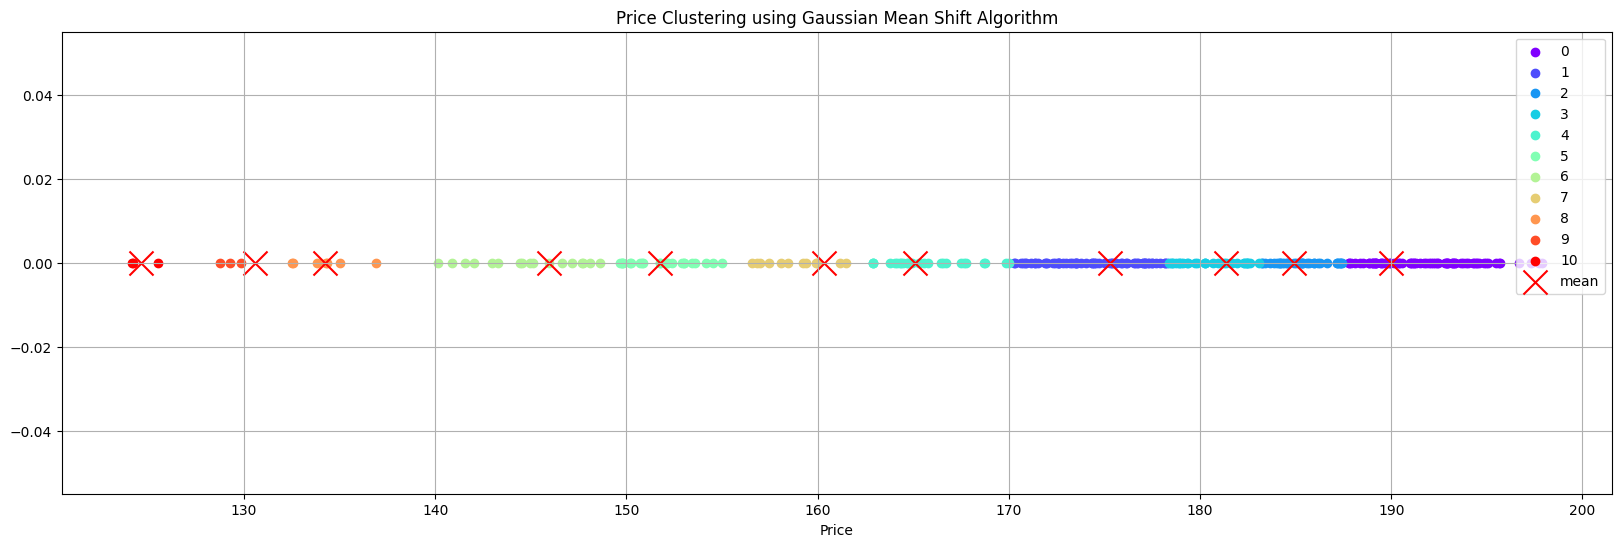

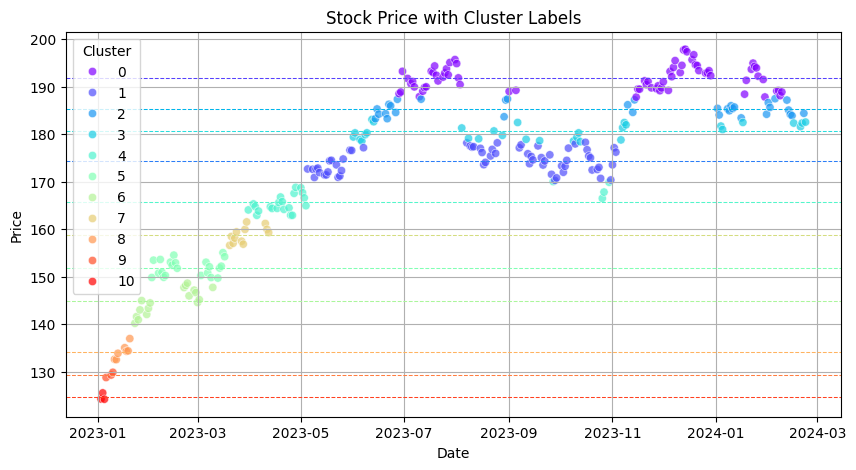

In [33]:
import yfinance as yf
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime  # Import datetime module from datetime package

# Download Apple stock data
end_date = datetime.now().strftime('%Y-%m-%d')
apple_data = yf.download('AAPL', start='2023-01-01', end=end_date, progress=False)

# Extract Adjusted Closing Prices
prices = apple_data['Adj Close'].values.reshape(-1, 1)

# Fit Mean Shift clustering algorithm
bandwidth = 3  # Bandwidth parameter for Mean Shift
ms = MeanShift(bandwidth=bandwidth)
ms.fit(prices)

# Get cluster centers
cluster_centers = ms.cluster_centers_
labels = ms.labels_
apple_data['Cluster'] = labels

# Define colors for each cluster
unique_labels = np.unique(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# Plot clusters using scatter plot
plt.figure(figsize=(20, 6))
for label, color in zip(unique_labels, colors):
    cluster_points = prices[labels == label]
    plt.scatter(cluster_points, np.zeros_like(cluster_points), color=color, alpha=1, label=f'{label}')

plt.scatter(cluster_centers, np.zeros_like(cluster_centers), color='red', marker='x', s=300, label='mean')
plt.title('Price Clustering using Gaussian Mean Shift Algorithm')
plt.xlabel('Price')
plt.ylabel('')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=apple_data, x=apple_data.index, y='Adj Close', hue='Cluster', palette='rainbow', legend='full', alpha=0.7)

for cluster in np.unique(labels):
    cluster_mean = np.mean(apple_data.loc[apple_data['Cluster'] == cluster, 'Adj Close'])
    cluster_color = sns.color_palette('rainbow', len(np.unique(labels)))[cluster]
    plt.axhline(y=cluster_mean, color=cluster_color, linestyle='--', linewidth=0.75)

plt.title('Stock Price with Cluster Labels')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Enter the stock symbol (e.g., AAPL for Apple): AAPL


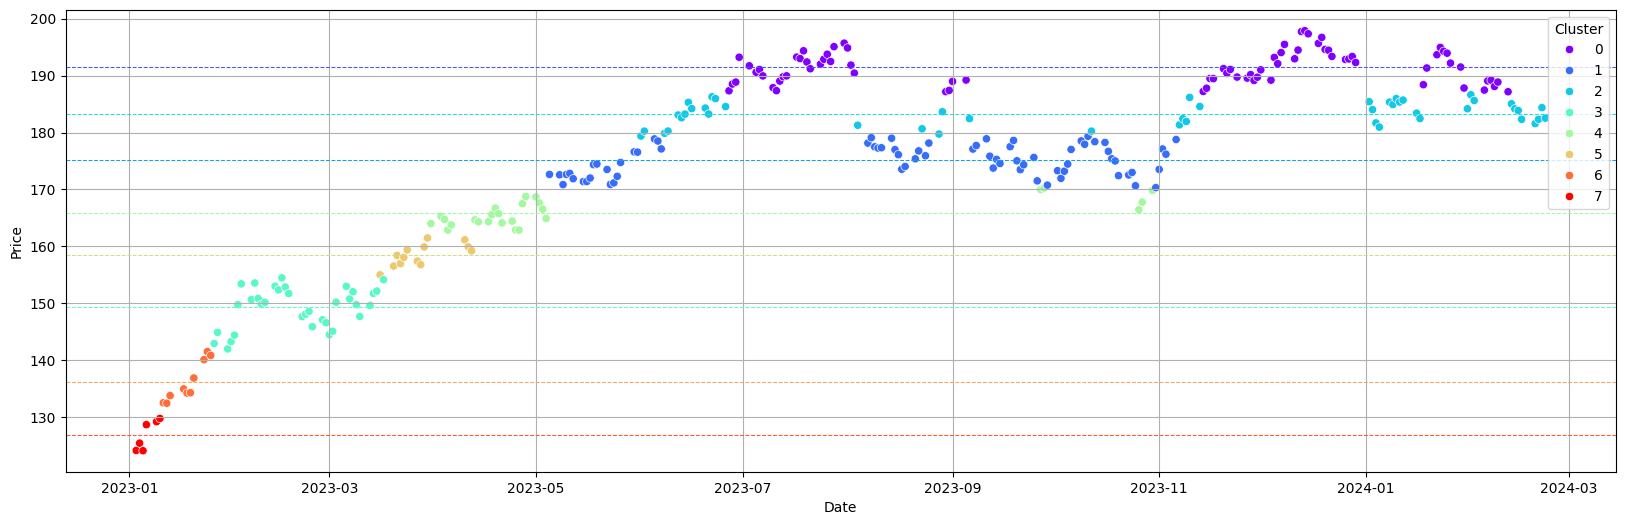

In [24]:
import yfinance as yf
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def download_stock_data(stock_symbol):
    end_date = datetime.now().strftime('%Y-%m-%d')
    stock_data = yf.download(stock_symbol, start='2023-01-01', end=end_date, progress=False)
    return stock_data

def mean_shift_clustering(stock_data):
    prices = stock_data['Adj Close'].values.reshape(-1, 1)
    bandwidth = 5
    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(prices)
    cluster_centers = ms.cluster_centers_
    labels = ms.labels_
    stock_data['Cluster'] = labels
    return stock_data , cluster_centers

def plot_stock_with_clusters(stock_data):
    plt.figure(figsize=(20, 6))
    sns.scatterplot(data=stock_data, x=stock_data.index, y='Adj Close', hue='Cluster', palette='rainbow', legend='full', alpha=1)
    for cluster in np.unique(stock_data['Cluster']):
        cluster_mean = np.mean(stock_data.loc[stock_data['Cluster'] == cluster, 'Adj Close'])
        cluster_color = sns.color_palette('rainbow', len(np.unique(stock_data['Cluster'])))[cluster]
        plt.axhline(y=cluster_mean, color=cluster_color, linestyle='--', linewidth=0.75)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

def main():
    stock_symbol = input("Enter the stock symbol (e.g., AAPL for Apple): ")
    #start_date = input("Enter the start date (YYYY-MM-DD): ")
    stock_data = download_stock_data(stock_symbol)
    clustered_stock_data, cluster_centers = mean_shift_clustering(stock_data)
    plot_stock_with_clusters(clustered_stock_data)

if __name__ == "__main__":
    main()
